# CE-40719: Deep Learning
## HW5 - GAN (100 points)

#### Name: Mahdi Kafi
#### Student No.: 99210753

### 1) Import Libraries

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 5) # set default size of plots

### 2) Loading Dataset (10 points)

In this notebook, you will use `MNIST` dataset to train your GAN. You can see more information about this dataset [here](http://yann.lecun.com/exdb/mnist/). This dataset is a 10 class dataset. It contains 60000 grayscale images (50000 for train and 10000 for test or validation) each with shape (3, 28, 28). Every image has a corresponding label which is a number in range 0 to 9.

In [12]:
# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist/', train=True, transform=transforms.Compose([transforms.ToTensor(),
                                                                                          transforms.Normalize(0.5, 0.5)]), download=True)
test_dataset = datasets.MNIST(root='./mnist/', train=False, transform=transforms.Compose([transforms.ToTensor(),
                                                                                         transforms.Normalize(0.5, 0.5)]), download=True)

In [13]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

################ Problem 01 (5 pts) ################
# define hyper parameters
batch_size = 100
d_lr = 2*1e-4
g_lr = 2*1e-4
n_epochs = 200
####################### End ########################
z_dim = 100

In [14]:

################ Problem 02 (5 pts) ################
# Define Dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
####################### End ########################

In [16]:
for img, label in train_loader:
    print(img.max())
    break

tensor(1.)


### 3) Defining Network (30 points)
At this stage, you should define a network that improves your GAN training and prevents problems such as mode collapse and vanishing gradients.

In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.discriminator = nn.Sequential(
            ################ Problem 03 (15 pts) ################
            # use linear or convolutional layer
            # use arbitrary techniques to stabilize training
            # transforms.Normalize(0.5, 0.5), 
            # nn.Flatten(),
            nn.Linear(784, 1024), 
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3), 
            nn.Linear(1024, 512), 
            nn.LeakyReLU(0.2), 
            nn.Dropout(0.3), 
            nn.Linear(512, 256), 
            nn.LeakyReLU(0.2), 
            nn.Dropout(0.3), 
            nn.Linear(256, 1),
            nn.Sigmoid()
            ####################### End ########################
        )

    def forward(self, x):
        return self.discriminator(x)


class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.generator = nn.Sequential(
            ################ Problem 04 (15 pts) ################
            # use linear or convolutional layer
            # use arbitrary techniques to stabilize training
            nn.Linear(100, 256), 
            nn.LeakyReLU(0.2), 
            nn.Linear(256, 512), 
            nn.LeakyReLU(0.2), 
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
            ####################### End ########################
        )

    def forward(self, z):
        return self.generator(z)


### 4) Train the Network 
At this step, you are going to train your network.

torch.Size([1, 28, 28])


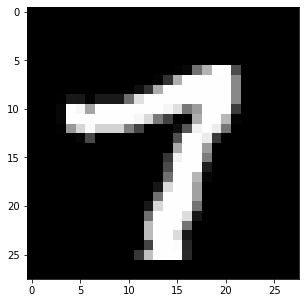

In [18]:
for images, _ in train_loader:
    print(images[0].size())
    plt.imshow(images[0].view(28, 28), cmap='gray')
    break

In [19]:
################ Problem 05 (5 pts) ################
# Create instances of modules (discriminator and generator)
# don't forget to put your models on device
discriminator = Discriminator().to(device)
generator = Generator().to(device)
####################### End ########################

In [20]:
################ Problem 06 (5 pts) ################
# Define two optimizer for discriminator and generator
d_optimizer = optim.Adam(discriminator.parameters(), lr=d_lr)
g_optimizer = optim.Adam(generator.parameters(), lr=g_lr)
####################### End ########################

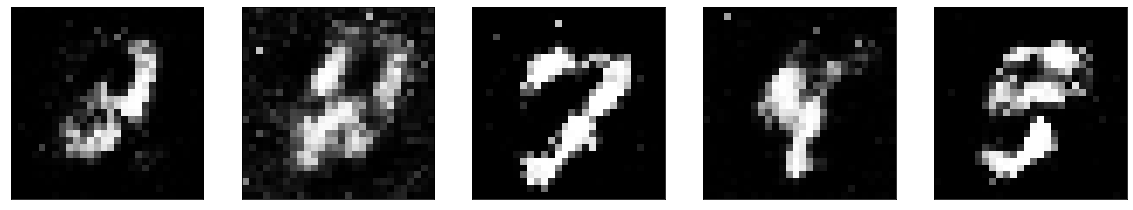

epoch: 1 	 discriminator last batch loss: 0.7932151556015015 	 generator last batch loss: 2.076763153076172
epoch: 2 	 discriminator last batch loss: 0.9708606600761414 	 generator last batch loss: 1.3184319734573364
epoch: 3 	 discriminator last batch loss: 0.9278310537338257 	 generator last batch loss: 1.3351424932479858
epoch: 4 	 discriminator last batch loss: 0.7848531007766724 	 generator last batch loss: 1.2587809562683105
epoch: 5 	 discriminator last batch loss: 1.0625941753387451 	 generator last batch loss: 1.5236469507217407
epoch: 6 	 discriminator last batch loss: 1.0328850746154785 	 generator last batch loss: 1.3542637825012207
epoch: 7 	 discriminator last batch loss: 0.9392848014831543 	 generator last batch loss: 1.622268795967102
epoch: 8 	 discriminator last batch loss: 0.8601017594337463 	 generator last batch loss: 1.3977737426757812
epoch: 9 	 discriminator last batch loss: 1.0758459568023682 	 generator last batch loss: 1.1877925395965576
epoch: 10 	 discrimin

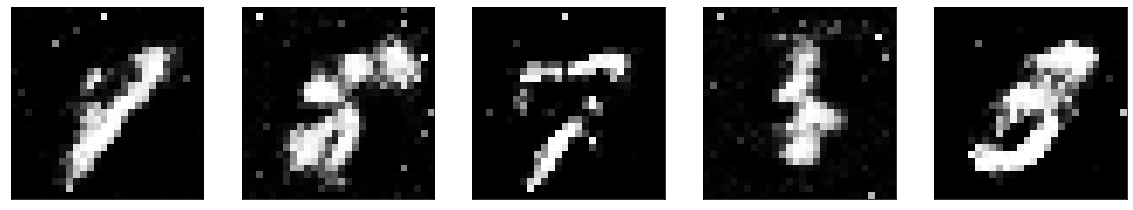

epoch: 11 	 discriminator last batch loss: 1.1618459224700928 	 generator last batch loss: 1.3110302686691284
epoch: 12 	 discriminator last batch loss: 0.8863477110862732 	 generator last batch loss: 1.424076795578003
epoch: 13 	 discriminator last batch loss: 1.1088976860046387 	 generator last batch loss: 1.2519748210906982
epoch: 14 	 discriminator last batch loss: 0.997471809387207 	 generator last batch loss: 1.492005705833435
epoch: 15 	 discriminator last batch loss: 1.1761157512664795 	 generator last batch loss: 1.175340175628662
epoch: 16 	 discriminator last batch loss: 1.2110202312469482 	 generator last batch loss: 1.285400629043579
epoch: 17 	 discriminator last batch loss: 1.1677110195159912 	 generator last batch loss: 1.4800662994384766
epoch: 18 	 discriminator last batch loss: 0.9971741437911987 	 generator last batch loss: 1.4270086288452148
epoch: 19 	 discriminator last batch loss: 0.9873054623603821 	 generator last batch loss: 1.303981900215149
epoch: 20 	 disc

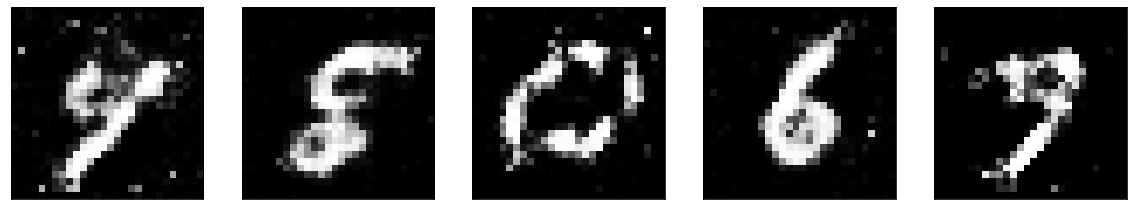

epoch: 21 	 discriminator last batch loss: 1.1812925338745117 	 generator last batch loss: 1.168089747428894
epoch: 22 	 discriminator last batch loss: 1.015434980392456 	 generator last batch loss: 1.2618435621261597
epoch: 23 	 discriminator last batch loss: 1.18143892288208 	 generator last batch loss: 0.9538134336471558
epoch: 24 	 discriminator last batch loss: 0.9940143823623657 	 generator last batch loss: 1.2041844129562378
epoch: 25 	 discriminator last batch loss: 1.2563819885253906 	 generator last batch loss: 1.1172820329666138
epoch: 26 	 discriminator last batch loss: 1.1347312927246094 	 generator last batch loss: 1.194962739944458
epoch: 27 	 discriminator last batch loss: 1.0856070518493652 	 generator last batch loss: 1.1740634441375732
epoch: 28 	 discriminator last batch loss: 1.0930429697036743 	 generator last batch loss: 1.1080330610275269
epoch: 29 	 discriminator last batch loss: 1.2815184593200684 	 generator last batch loss: 1.102967381477356
epoch: 30 	 disc

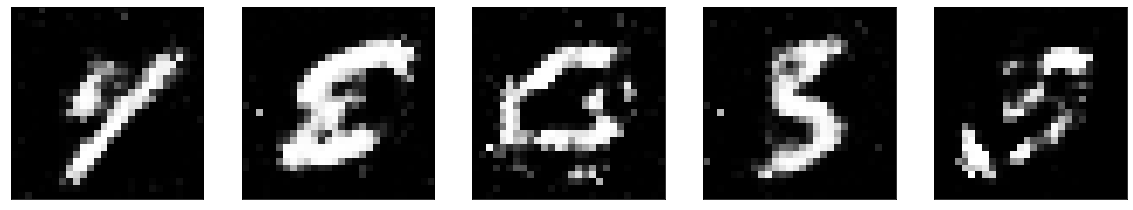

epoch: 31 	 discriminator last batch loss: 1.1546783447265625 	 generator last batch loss: 1.1243382692337036
epoch: 32 	 discriminator last batch loss: 1.2974343299865723 	 generator last batch loss: 0.9037951231002808
epoch: 33 	 discriminator last batch loss: 1.1387269496917725 	 generator last batch loss: 1.0317410230636597
epoch: 34 	 discriminator last batch loss: 1.0516853332519531 	 generator last batch loss: 1.063891053199768
epoch: 35 	 discriminator last batch loss: 1.2489013671875 	 generator last batch loss: 1.1334234476089478
epoch: 36 	 discriminator last batch loss: 1.2381596565246582 	 generator last batch loss: 1.1529860496520996
epoch: 37 	 discriminator last batch loss: 1.175233006477356 	 generator last batch loss: 1.235217571258545
epoch: 38 	 discriminator last batch loss: 1.1260992288589478 	 generator last batch loss: 1.0391651391983032
epoch: 39 	 discriminator last batch loss: 1.224605679512024 	 generator last batch loss: 1.0297729969024658
epoch: 40 	 discr

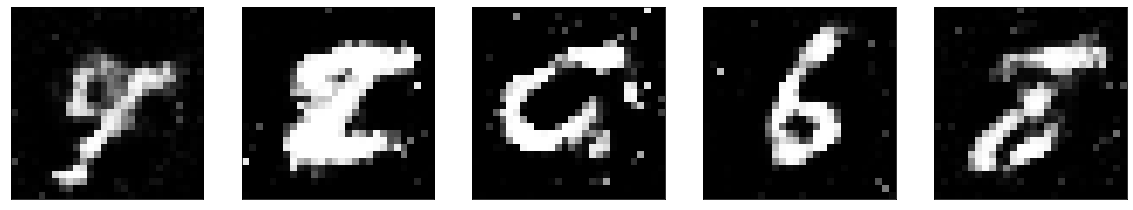

epoch: 41 	 discriminator last batch loss: 1.1478476524353027 	 generator last batch loss: 1.007918119430542
epoch: 42 	 discriminator last batch loss: 1.2549786567687988 	 generator last batch loss: 0.8215785622596741
epoch: 43 	 discriminator last batch loss: 1.2597987651824951 	 generator last batch loss: 0.9199777245521545
epoch: 44 	 discriminator last batch loss: 1.021905779838562 	 generator last batch loss: 1.31621253490448
epoch: 45 	 discriminator last batch loss: 1.1278141736984253 	 generator last batch loss: 1.137281894683838
epoch: 46 	 discriminator last batch loss: 1.2673509120941162 	 generator last batch loss: 1.1333162784576416
epoch: 47 	 discriminator last batch loss: 1.3032163381576538 	 generator last batch loss: 0.9070091843605042
epoch: 48 	 discriminator last batch loss: 1.427562952041626 	 generator last batch loss: 0.954364001750946
epoch: 49 	 discriminator last batch loss: 1.291252613067627 	 generator last batch loss: 0.8947626948356628
epoch: 50 	 discri

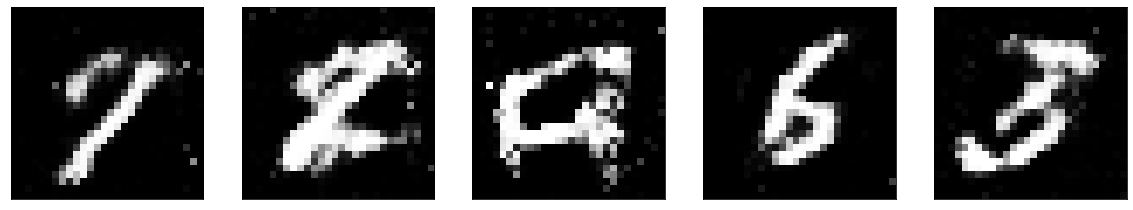

epoch: 51 	 discriminator last batch loss: 1.0863938331604004 	 generator last batch loss: 1.1678017377853394
epoch: 52 	 discriminator last batch loss: 1.202242374420166 	 generator last batch loss: 1.2588200569152832
epoch: 53 	 discriminator last batch loss: 1.1307435035705566 	 generator last batch loss: 0.9210205078125
epoch: 54 	 discriminator last batch loss: 1.1946029663085938 	 generator last batch loss: 1.0337252616882324
epoch: 55 	 discriminator last batch loss: 1.2532331943511963 	 generator last batch loss: 0.9499872326850891
epoch: 56 	 discriminator last batch loss: 1.2293250560760498 	 generator last batch loss: 1.0030999183654785
epoch: 57 	 discriminator last batch loss: 1.3177120685577393 	 generator last batch loss: 0.9753441214561462
epoch: 58 	 discriminator last batch loss: 1.3206582069396973 	 generator last batch loss: 0.9486199617385864
epoch: 59 	 discriminator last batch loss: 1.306458592414856 	 generator last batch loss: 0.8944345116615295
epoch: 60 	 dis

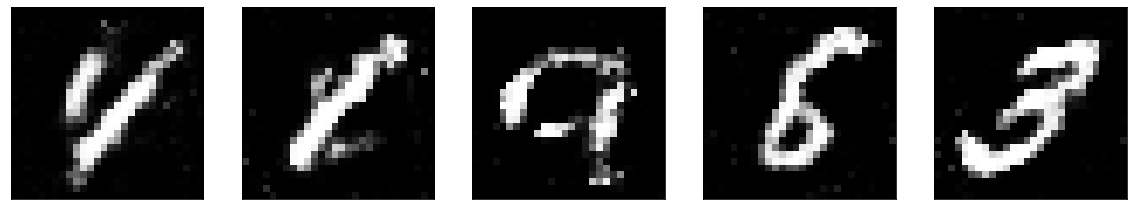

epoch: 61 	 discriminator last batch loss: 1.167495608329773 	 generator last batch loss: 1.0796557664871216
epoch: 62 	 discriminator last batch loss: 1.3001320362091064 	 generator last batch loss: 0.9099481105804443
epoch: 63 	 discriminator last batch loss: 1.1742908954620361 	 generator last batch loss: 1.0382741689682007
epoch: 64 	 discriminator last batch loss: 1.3235447406768799 	 generator last batch loss: 0.8371496200561523
epoch: 65 	 discriminator last batch loss: 1.1683706045150757 	 generator last batch loss: 0.9909115433692932
epoch: 66 	 discriminator last batch loss: 1.225356101989746 	 generator last batch loss: 0.893712043762207
epoch: 67 	 discriminator last batch loss: 1.1681103706359863 	 generator last batch loss: 0.9813879132270813
epoch: 68 	 discriminator last batch loss: 1.2653779983520508 	 generator last batch loss: 1.0285106897354126
epoch: 69 	 discriminator last batch loss: 1.2872146368026733 	 generator last batch loss: 1.1749732494354248
epoch: 70 	 d

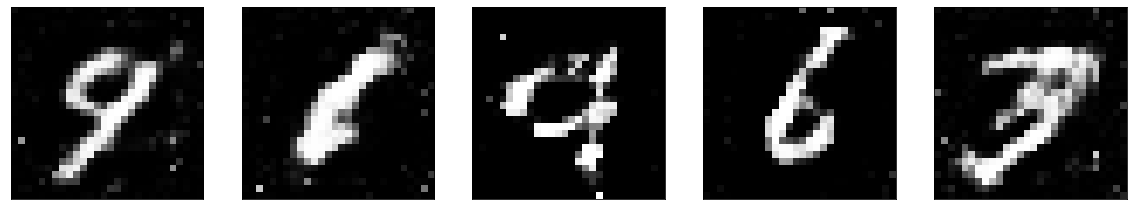

epoch: 71 	 discriminator last batch loss: 1.2229204177856445 	 generator last batch loss: 1.081953763961792
epoch: 72 	 discriminator last batch loss: 1.3265035152435303 	 generator last batch loss: 0.8878718614578247
epoch: 73 	 discriminator last batch loss: 1.3366323709487915 	 generator last batch loss: 0.9764131903648376
epoch: 74 	 discriminator last batch loss: 1.192650318145752 	 generator last batch loss: 0.9595921039581299
epoch: 75 	 discriminator last batch loss: 1.2306153774261475 	 generator last batch loss: 0.9137094020843506
epoch: 76 	 discriminator last batch loss: 1.2806212902069092 	 generator last batch loss: 0.8615807890892029
epoch: 77 	 discriminator last batch loss: 1.2617530822753906 	 generator last batch loss: 1.125048041343689
epoch: 78 	 discriminator last batch loss: 1.1990573406219482 	 generator last batch loss: 1.058692455291748
epoch: 79 	 discriminator last batch loss: 1.1929967403411865 	 generator last batch loss: 0.8916619420051575
epoch: 80 	 di

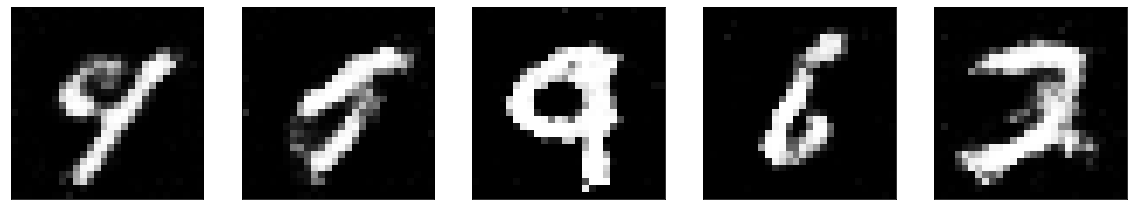

epoch: 81 	 discriminator last batch loss: 1.2364554405212402 	 generator last batch loss: 0.942356526851654
epoch: 82 	 discriminator last batch loss: 1.1953098773956299 	 generator last batch loss: 1.0501389503479004
epoch: 83 	 discriminator last batch loss: 1.2790281772613525 	 generator last batch loss: 0.9780423045158386
epoch: 84 	 discriminator last batch loss: 1.2427423000335693 	 generator last batch loss: 0.9165704846382141
epoch: 85 	 discriminator last batch loss: 1.1306825876235962 	 generator last batch loss: 1.1149590015411377
epoch: 86 	 discriminator last batch loss: 1.2587000131607056 	 generator last batch loss: 0.9214325547218323
epoch: 87 	 discriminator last batch loss: 1.3169928789138794 	 generator last batch loss: 0.8890827894210815
epoch: 88 	 discriminator last batch loss: 1.3316936492919922 	 generator last batch loss: 1.0157088041305542
epoch: 89 	 discriminator last batch loss: 1.2414896488189697 	 generator last batch loss: 1.0811190605163574
epoch: 90 	

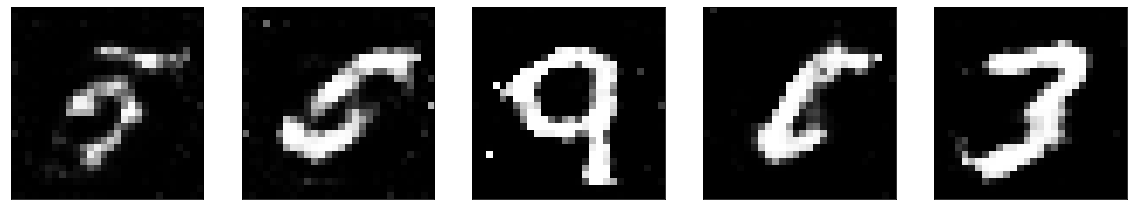

epoch: 91 	 discriminator last batch loss: 1.1722893714904785 	 generator last batch loss: 1.0865498781204224
epoch: 92 	 discriminator last batch loss: 1.3079228401184082 	 generator last batch loss: 0.7881791591644287
epoch: 93 	 discriminator last batch loss: 1.135603427886963 	 generator last batch loss: 1.0682207345962524
epoch: 94 	 discriminator last batch loss: 1.2157044410705566 	 generator last batch loss: 0.9418752789497375
epoch: 95 	 discriminator last batch loss: 1.3560101985931396 	 generator last batch loss: 0.8031957745552063
epoch: 96 	 discriminator last batch loss: 1.2195148468017578 	 generator last batch loss: 1.0522253513336182
epoch: 97 	 discriminator last batch loss: 1.3109815120697021 	 generator last batch loss: 0.7931382060050964
epoch: 98 	 discriminator last batch loss: 1.2721102237701416 	 generator last batch loss: 0.7884857654571533
epoch: 99 	 discriminator last batch loss: 1.2164537906646729 	 generator last batch loss: 0.9980959892272949
epoch: 100 

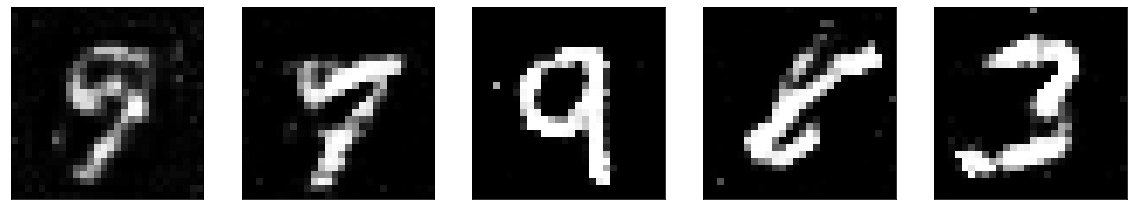

epoch: 101 	 discriminator last batch loss: 1.1093469858169556 	 generator last batch loss: 1.0123155117034912
epoch: 102 	 discriminator last batch loss: 1.2311303615570068 	 generator last batch loss: 0.9154608845710754
epoch: 103 	 discriminator last batch loss: 1.3386170864105225 	 generator last batch loss: 0.7490885853767395
epoch: 104 	 discriminator last batch loss: 1.2618532180786133 	 generator last batch loss: 0.9359981417655945
epoch: 105 	 discriminator last batch loss: 1.2450268268585205 	 generator last batch loss: 0.9088201522827148
epoch: 106 	 discriminator last batch loss: 1.1923308372497559 	 generator last batch loss: 0.9865613579750061
epoch: 107 	 discriminator last batch loss: 1.2350331544876099 	 generator last batch loss: 1.031049132347107
epoch: 108 	 discriminator last batch loss: 1.290871024131775 	 generator last batch loss: 0.9229941368103027
epoch: 109 	 discriminator last batch loss: 1.2787060737609863 	 generator last batch loss: 0.9726765155792236
epo

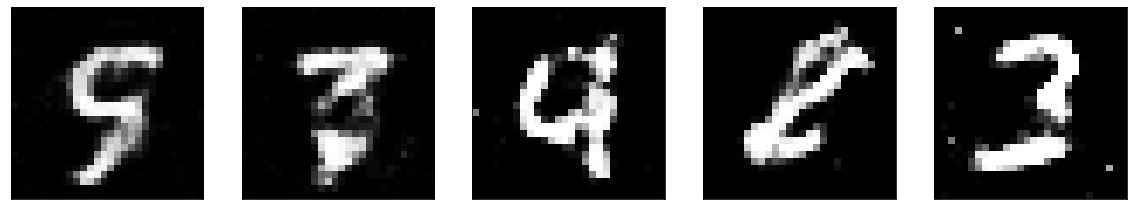

epoch: 111 	 discriminator last batch loss: 1.3575187921524048 	 generator last batch loss: 0.8428659439086914
epoch: 112 	 discriminator last batch loss: 1.2151137590408325 	 generator last batch loss: 0.989427387714386
epoch: 113 	 discriminator last batch loss: 1.240126371383667 	 generator last batch loss: 0.9335354566574097
epoch: 114 	 discriminator last batch loss: 1.3257365226745605 	 generator last batch loss: 0.8946632742881775
epoch: 115 	 discriminator last batch loss: 1.2979824542999268 	 generator last batch loss: 0.8994848728179932
epoch: 116 	 discriminator last batch loss: 1.3114135265350342 	 generator last batch loss: 0.8040772676467896
epoch: 117 	 discriminator last batch loss: 1.2176175117492676 	 generator last batch loss: 1.0109394788742065
epoch: 118 	 discriminator last batch loss: 1.2757796049118042 	 generator last batch loss: 0.9133358001708984
epoch: 119 	 discriminator last batch loss: 1.2885422706604004 	 generator last batch loss: 0.9387990832328796
epo

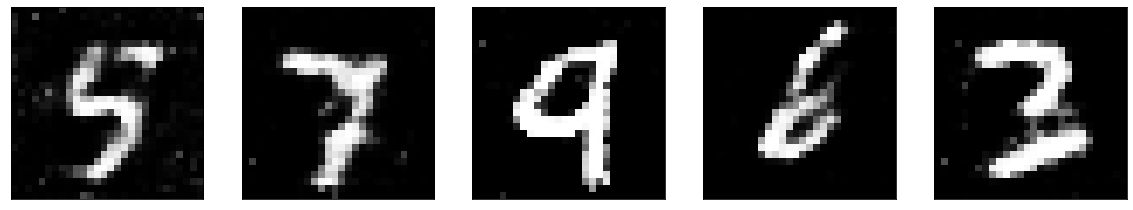

epoch: 121 	 discriminator last batch loss: 1.241065502166748 	 generator last batch loss: 0.9545513987541199
epoch: 122 	 discriminator last batch loss: 1.1875330209732056 	 generator last batch loss: 0.9017991423606873
epoch: 123 	 discriminator last batch loss: 1.276634693145752 	 generator last batch loss: 1.042134404182434
epoch: 124 	 discriminator last batch loss: 1.2574412822723389 	 generator last batch loss: 0.9232078194618225
epoch: 125 	 discriminator last batch loss: 1.4018113613128662 	 generator last batch loss: 0.7674992680549622
epoch: 126 	 discriminator last batch loss: 1.3366596698760986 	 generator last batch loss: 0.8497063517570496
epoch: 127 	 discriminator last batch loss: 1.2711679935455322 	 generator last batch loss: 0.782378077507019
epoch: 128 	 discriminator last batch loss: 1.1830642223358154 	 generator last batch loss: 0.9933096766471863
epoch: 129 	 discriminator last batch loss: 1.2026851177215576 	 generator last batch loss: 0.8114750981330872
epoch

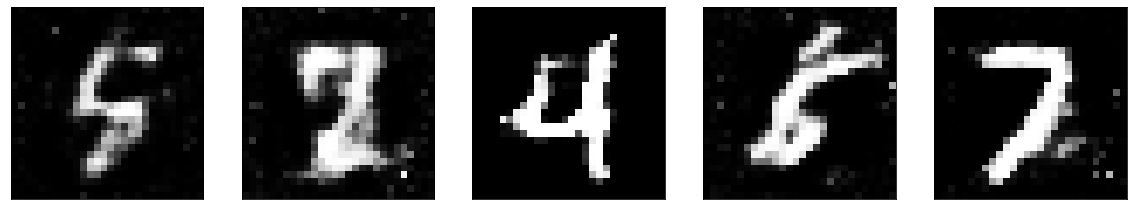

epoch: 131 	 discriminator last batch loss: 1.2528109550476074 	 generator last batch loss: 1.0829341411590576
epoch: 132 	 discriminator last batch loss: 1.2983176708221436 	 generator last batch loss: 0.8944931030273438
epoch: 133 	 discriminator last batch loss: 1.3905036449432373 	 generator last batch loss: 1.0403125286102295
epoch: 134 	 discriminator last batch loss: 1.3702647686004639 	 generator last batch loss: 1.1150771379470825
epoch: 135 	 discriminator last batch loss: 1.183082938194275 	 generator last batch loss: 1.0977919101715088
epoch: 136 	 discriminator last batch loss: 1.242611289024353 	 generator last batch loss: 0.991348385810852
epoch: 137 	 discriminator last batch loss: 1.3483563661575317 	 generator last batch loss: 0.7849749326705933
epoch: 138 	 discriminator last batch loss: 1.3068057298660278 	 generator last batch loss: 0.8814213275909424
epoch: 139 	 discriminator last batch loss: 1.1798796653747559 	 generator last batch loss: 0.9865424633026123
epoc

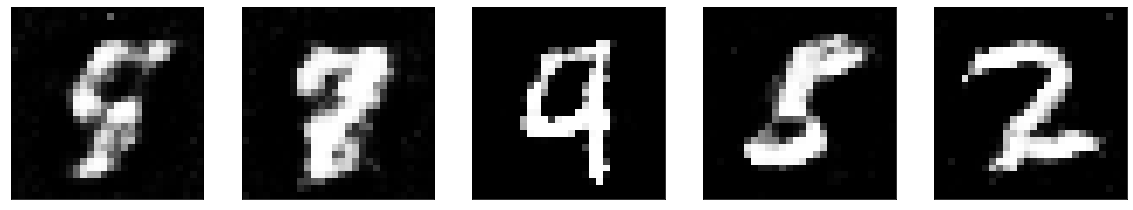

epoch: 141 	 discriminator last batch loss: 1.2186522483825684 	 generator last batch loss: 0.9351940155029297
epoch: 142 	 discriminator last batch loss: 1.2067341804504395 	 generator last batch loss: 0.9238570332527161
epoch: 143 	 discriminator last batch loss: 1.3528165817260742 	 generator last batch loss: 0.9678410291671753
epoch: 144 	 discriminator last batch loss: 1.2027630805969238 	 generator last batch loss: 1.0954830646514893
epoch: 145 	 discriminator last batch loss: 1.2524113655090332 	 generator last batch loss: 1.0144304037094116
epoch: 146 	 discriminator last batch loss: 1.1815061569213867 	 generator last batch loss: 0.959320068359375
epoch: 147 	 discriminator last batch loss: 1.255850076675415 	 generator last batch loss: 0.7969414591789246
epoch: 148 	 discriminator last batch loss: 1.329351782798767 	 generator last batch loss: 0.8220288157463074
epoch: 149 	 discriminator last batch loss: 1.3745343685150146 	 generator last batch loss: 0.7841836214065552
epoc

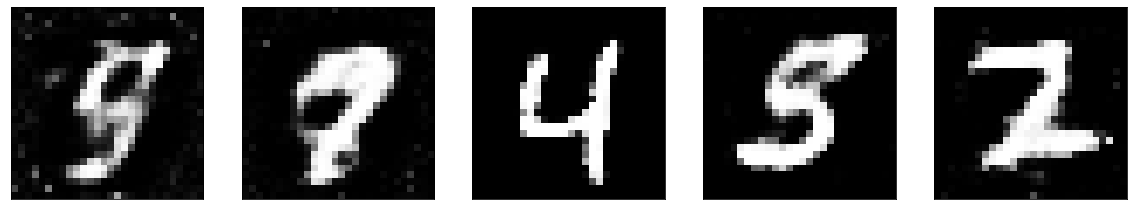

epoch: 151 	 discriminator last batch loss: 1.231726884841919 	 generator last batch loss: 0.9206307530403137
epoch: 152 	 discriminator last batch loss: 1.2137548923492432 	 generator last batch loss: 0.9011021256446838
epoch: 153 	 discriminator last batch loss: 1.234250783920288 	 generator last batch loss: 1.0382429361343384
epoch: 154 	 discriminator last batch loss: 1.2825863361358643 	 generator last batch loss: 0.8525773286819458
epoch: 155 	 discriminator last batch loss: 1.2537518739700317 	 generator last batch loss: 0.8185743689537048
epoch: 156 	 discriminator last batch loss: 1.197303056716919 	 generator last batch loss: 0.8950643539428711
epoch: 157 	 discriminator last batch loss: 1.297802209854126 	 generator last batch loss: 0.8495157957077026
epoch: 158 	 discriminator last batch loss: 1.3614492416381836 	 generator last batch loss: 0.941518247127533
epoch: 159 	 discriminator last batch loss: 1.2640457153320312 	 generator last batch loss: 0.8546884059906006
epoch:

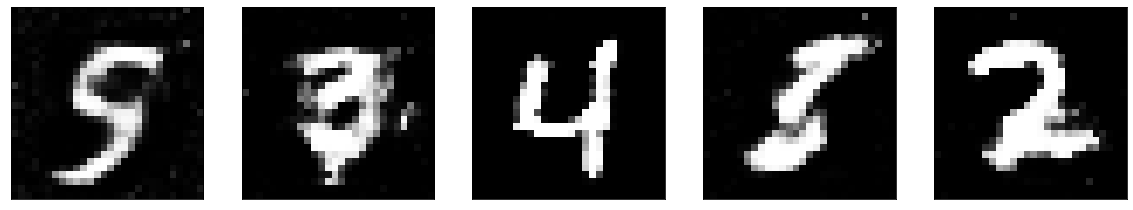

epoch: 161 	 discriminator last batch loss: 1.3088254928588867 	 generator last batch loss: 0.7651475071907043
epoch: 162 	 discriminator last batch loss: 1.2883687019348145 	 generator last batch loss: 0.8709682822227478
epoch: 163 	 discriminator last batch loss: 1.2852699756622314 	 generator last batch loss: 0.8638556003570557
epoch: 164 	 discriminator last batch loss: 1.2038748264312744 	 generator last batch loss: 0.9867892861366272
epoch: 165 	 discriminator last batch loss: 1.3183152675628662 	 generator last batch loss: 0.8104934692382812
epoch: 166 	 discriminator last batch loss: 1.239069938659668 	 generator last batch loss: 0.9538733959197998
epoch: 167 	 discriminator last batch loss: 1.3105309009552002 	 generator last batch loss: 0.8446877598762512
epoch: 168 	 discriminator last batch loss: 1.270554542541504 	 generator last batch loss: 0.8617342710494995
epoch: 169 	 discriminator last batch loss: 1.3643014430999756 	 generator last batch loss: 0.7987026572227478
epo

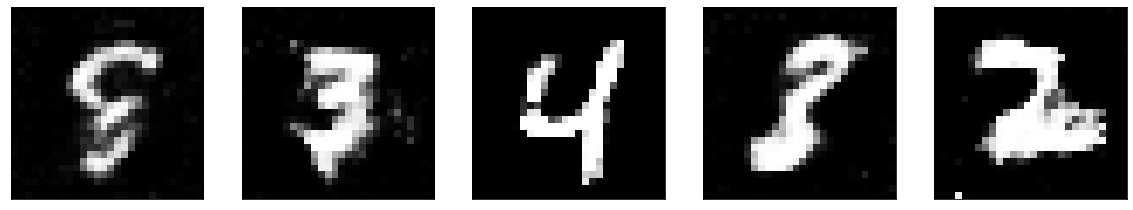

epoch: 171 	 discriminator last batch loss: 1.237497329711914 	 generator last batch loss: 0.9663999676704407
epoch: 172 	 discriminator last batch loss: 1.3594566583633423 	 generator last batch loss: 0.7901525497436523
epoch: 173 	 discriminator last batch loss: 1.2327852249145508 	 generator last batch loss: 0.9493276476860046
epoch: 174 	 discriminator last batch loss: 1.398627758026123 	 generator last batch loss: 0.8461441397666931
epoch: 175 	 discriminator last batch loss: 1.2260844707489014 	 generator last batch loss: 0.8808640837669373
epoch: 176 	 discriminator last batch loss: 1.2860137224197388 	 generator last batch loss: 0.851946234703064
epoch: 177 	 discriminator last batch loss: 1.2829599380493164 	 generator last batch loss: 0.8208417892456055
epoch: 178 	 discriminator last batch loss: 1.1912600994110107 	 generator last batch loss: 0.9714207053184509
epoch: 179 	 discriminator last batch loss: 1.1550803184509277 	 generator last batch loss: 1.1811550855636597
epoc

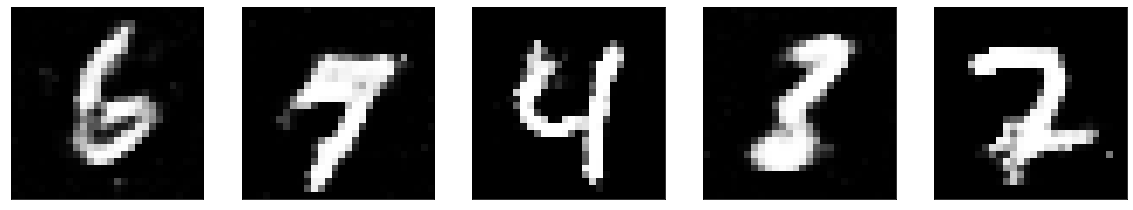

epoch: 181 	 discriminator last batch loss: 1.2985985279083252 	 generator last batch loss: 0.871194064617157
epoch: 182 	 discriminator last batch loss: 1.242140293121338 	 generator last batch loss: 0.9236724376678467
epoch: 183 	 discriminator last batch loss: 1.3249995708465576 	 generator last batch loss: 0.8308897018432617
epoch: 184 	 discriminator last batch loss: 1.3636033535003662 	 generator last batch loss: 0.863369882106781
epoch: 185 	 discriminator last batch loss: 1.3011527061462402 	 generator last batch loss: 0.8450236916542053
epoch: 186 	 discriminator last batch loss: 1.1878260374069214 	 generator last batch loss: 0.8858428597450256
epoch: 187 	 discriminator last batch loss: 1.2778173685073853 	 generator last batch loss: 0.8304269909858704
epoch: 188 	 discriminator last batch loss: 1.237324595451355 	 generator last batch loss: 0.9709296822547913
epoch: 189 	 discriminator last batch loss: 1.3842382431030273 	 generator last batch loss: 0.829281747341156
epoch:

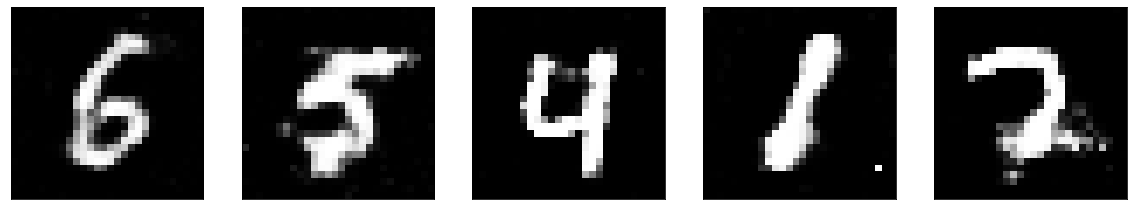

epoch: 191 	 discriminator last batch loss: 1.1797505617141724 	 generator last batch loss: 0.8189486265182495
epoch: 192 	 discriminator last batch loss: 1.3306857347488403 	 generator last batch loss: 0.8635432720184326
epoch: 193 	 discriminator last batch loss: 1.2856059074401855 	 generator last batch loss: 0.9094939231872559
epoch: 194 	 discriminator last batch loss: 1.3519206047058105 	 generator last batch loss: 0.9786889553070068
epoch: 195 	 discriminator last batch loss: 1.2704575061798096 	 generator last batch loss: 0.8496332168579102
epoch: 196 	 discriminator last batch loss: 1.3019840717315674 	 generator last batch loss: 0.7743597030639648
epoch: 197 	 discriminator last batch loss: 1.3698790073394775 	 generator last batch loss: 0.7904898524284363
epoch: 198 	 discriminator last batch loss: 1.173062801361084 	 generator last batch loss: 0.9170646667480469
epoch: 199 	 discriminator last batch loss: 1.397317886352539 	 generator last batch loss: 0.8674821257591248
epo

In [22]:
plot_frequency = 10
loss_fn =  nn.BCELoss()

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        ################ Problem 07 (15 pts) ################
        # put your inputs on device
        # Prepare what you need for training, like inputs for modules and variables for computing loss
        batch_size = images.size(0)
        real_images = images.view(batch_size, -1).to(device)
        # real_images = images.to(device)
        # Scale the real images between -1, 1
        # for idx, image in enumerate(real_images):
        #     pass
        real_labels = torch.ones(batch_size).to(device)
        z = torch.randn(batch_size, z_dim, requires_grad=True).to(device)
        fake_images = generator(z)
        fake_labels = torch.zeros(batch_size).to(device)
        ####################### End ########################



        ################ Problem 08 (10 pts) ################
        # calculate discriminator loss and update it
        # discriminator.zero_grad()
        d_optimizer.zero_grad()
        # discriminator.zero_grad()

        real_pred = discriminator(real_images).flatten()
        real_loss = loss_fn(real_pred, real_labels)
        # real_error.backward()

        fake_pred = discriminator(fake_images).flatten()
        fake_loss = loss_fn(fake_pred, fake_labels)
        # fake_error.backward()

        d_loss = real_loss + fake_loss
        d_loss.backward()
        d_optimizer.step()
        ####################### End ########################
        
        

        ################ Problem 09 (10 pts) ################
        # calculate generator loss and update it
        z = torch.randn(batch_size, z_dim, requires_grad=True).to(device)
        fake_images = generator(z)
        pred = discriminator(fake_images).flatten()

        g_optimizer.zero_grad()
        # generator.zero_grad()
        g_loss = loss_fn(pred, real_labels)
        g_loss.backward()
        g_optimizer.step()

        ####################### End ########################


    ################ Problem 10 (10 pts) ################
    # plot some of the generated pictures based on plot frequency variable
    if epoch == 0:
        z_plot = torch.randn(5, z_dim).to(device)
    if (epoch % plot_frequency == 0):
        fake_images = generator(z_plot).cpu().detach().numpy()
        fig, ax = plt.subplots(1, 5)
        # fig.title(f"Epoch {epoch+1}", fontsize=14)
        for idx in range(5):
            ax[idx].imshow(fake_images[idx].reshape(28, 28), cmap='gray')
            ax[idx].set_xticks([])
            ax[idx].set_yticks([])
        plt.show()

    ####################### End ########################
    
    print("epoch: {} \t discriminator last batch loss: {} \t generator last batch loss: {}".format(epoch + 1, 
                                                                                            d_loss.item(), 
                                                                                            g_loss.item()))

### 5) Save Generator
Save your final generator parameters. Upload it with your other files.

In [23]:
################ Problem 11 (5 pts) ################
# save state dict of your generator
torch.save(generator.state_dict(), "generator.pth")
print("Saved PyTorch Model State to generator.pth")
####################### End ########################

Saved PyTorch Model State to generator.pth
